In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.python.client import device_lib
# GPU 인식 되었는지 확인
# if not tf.config.list_physical_devices('GPU'):
#     print('GPU is not detected!!!')
# else:
#     print('GPU detected!!!\n')
#     print('Device type list:')
#     print(device_lib.list_local_devices())
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
#모든 열 보기
pd.set_option('display.max_columns', None)

In [3]:
path = 'D:/Dataset/Competitons/Jeju/'
train = pd.read_csv(path + 'train.csv', parse_dates=["base_date"]).copy()
test = pd.read_csv(path + 'test.csv', parse_dates=['base_date'].copy())
origin_train = train.copy()
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


변수명,변수 설명
1. id,아이디
2. base_date,날짜
3. day_of_week,요일
4. base_hour,시간대
5. lane_count,차로수
6. road_rating,도로등급
7. multi_linked,중용구간 여부
8. connect_code,연결로 코드
9. maximum_speed_limit,최고속도제한
10. weight_restricted,통과제한하중
11. hight_restricted,통과제한높이
12. road_type,도로유형
13. start_latitude,시작지점의 위도
14. start_longitude,시작지점의 경도
15. start_turn_restricted,시작 지점의 회전제한 유무
16. end_latitude,도착지점의 위도
17. end_longitude,도착지점의 경도
18. end_turn_restricted,도작지점의 회전제한 유무
19. road_name,도로명
20. start_node_name,시작지점명
21. end_node_name,도착지점명
22. vehicle_restricted,통과제한차량
23. target,평균속도(km)

https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  vehicle_restricted     float64       
 11  weight_restricted      float64       
 12  height_restricted      float64       
 13  road_type              int64         
 14  start_node_name        object        
 15  start_latitude         float64       
 16  start_longitude        float64       
 17  start_turn_restricted  object        
 18  end_node_name         

In [5]:
train.head(5)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [6]:
def date_split(df):

    df['year'] = df['base_date'].dt.year
    df['month'] = df['base_date'].dt.month
    df['day'] = df['base_date'].dt.day
    df['quarter'] = df['base_date'].dt.quarter
    df['maximum_speed_limit - lane_count'] = df['maximum_speed_limit'] - df['lane_count']
    df['lane_count * base_hour'] = df['lane_count'] * df['base_hour']
#     df['maximum_speed_limit - (lane_count * base_hour)'] = df['maximum_speed_limit'] - df['lane_count * base_hour']

    return df
    
train = date_split(train)
test = date_split(test)
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,2,59.0,17
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,3,58.0,42
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,4,78.0,14
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,1,48.0,26
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,4,78.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,4,49.0,16
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,1,78.0,4
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,2,58.0,44
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,4,78.0,4


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 29 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   id                                object        
 1   base_date                         datetime64[ns]
 2   day_of_week                       object        
 3   base_hour                         int64         
 4   lane_count                        int64         
 5   road_rating                       int64         
 6   road_name                         object        
 7   multi_linked                      int64         
 8   connect_code                      int64         
 9   maximum_speed_limit               float64       
 10  vehicle_restricted                float64       
 11  weight_restricted                 float64       
 12  height_restricted                 float64       
 13  road_type                         int64         
 14  start_node_name   

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

label = LabelEncoder()
train_label = train.copy()
test_label = test.copy()

cat_features = ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']

for i in cat_features:
    label = LabelEncoder()
    train_label[i] = label.fit_transform(train_label[i])
    test_label[i] = label.transform(test_label[i])

train_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,0,60.0,0.0,32400.0,0.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,0,60.0,0.0,0.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,0,80.0,0.0,0.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,0,50.0,0.0,0.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,0,80.0,0.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,1,107,0,0,0,50.0,0.0,0.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16
4701213,TRAIN_4701213,2022-03-31,1,2,2,107,0,0,0,80.0,0.0,43200.0,0.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4
4701214,TRAIN_4701214,2022-06-13,3,22,2,103,35,0,0,60.0,0.0,0.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44
4701215,TRAIN_4701215,2021-10-20,2,2,2,103,37,0,0,80.0,0.0,0.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4


In [9]:
test_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,TEST_000000,2022-08-25,1,17,3,107,32,0,0,70.0,0.0,0.0,0.0,0,163,33.499427,126.541298,0,403,33.500772,126.543837,1,2022,8,25,3,67.0,51
1,TEST_000001,2022-08-09,6,12,2,103,35,0,0,70.0,0.0,0.0,0.0,3,412,33.258507,126.427003,0,22,33.258119,126.415840,0,2022,8,9,3,68.0,24
2,TEST_000002,2022-08-05,0,2,1,103,36,0,0,60.0,0.0,0.0,0.0,0,97,33.258960,126.476508,0,95,33.259206,126.474687,0,2022,8,5,3,59.0,2
3,TEST_000003,2022-08-18,1,23,3,103,34,0,0,70.0,0.0,0.0,0.0,0,262,33.473494,126.545647,0,350,33.471061,126.545467,0,2022,8,18,3,67.0,69
4,TEST_000004,2022-08-10,2,17,3,106,12,0,0,70.0,0.0,0.0,0.0,0,153,33.501477,126.569223,0,145,33.496863,126.581230,0,2022,8,10,3,67.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,1,103,36,0,0,80.0,0.0,0.0,0.0,0,337,33.472819,126.463030,0,90,33.470483,126.460846,0,2022,8,27,3,79.0,5
291237,TEST_291237,2022-08-19,0,20,2,103,34,0,0,60.0,0.0,0.0,0.0,0,287,33.305359,126.598914,0,451,33.300796,126.600332,0,2022,8,19,3,58.0,40
291238,TEST_291238,2022-08-05,0,11,1,107,23,0,0,30.0,0.0,0.0,0.0,0,119,33.493624,126.496769,1,437,33.497500,126.496946,1,2022,8,5,3,29.0,11
291239,TEST_291239,2022-08-12,0,7,2,107,1,0,0,60.0,0.0,0.0,0.0,0,40,33.254782,126.507014,0,346,33.255659,126.507333,0,2022,8,12,3,58.0,14


In [10]:
onehot_features = ['road_rating', 'road_type', 'weight_restricted', 'base_hour', 'maximum_speed_limit', 'connect_code']

for i in onehot_features:
    onehot = OneHotEncoder(sparse = False)
    train_onehot = onehot.fit_transform(train_label[[i]])
    train_onehot = pd.DataFrame(train_onehot, columns = [i + '_' + str(col) for col in onehot.categories_[0]])
    train_label = pd.concat([train_label.drop(columns = [i]), train_onehot], axis = 1)
    
    test_onehot = onehot.transform(test_label[[i]])
    test_onehot = pd.DataFrame(test_onehot, columns = [i + '_' + str(col) for col in onehot.categories_[0]])
    test_label = pd.concat([test_label.drop(columns = [i]), test_onehot], axis = 1)

train_label

,id,base_date,day_of_week,lane_count,road_name,multi_linked,vehicle_restricted,height_restricted,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,base_hour_0,base_hour_1,base_hour_2,base_hour_3,base_hour_4,base_hour_5,base_hour_6,base_hour_7,base_hour_8,base_hour_9,base_hour_10,base_hour_11,base_hour_12,base_hour_13,base_hour_14,base_hour_15,base_hour_16,base_hour_17,base_hour_18,base_hour_19,base_hour_20,base_hour_21,base_hour_22,base_hour_23,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0,connect_code_0,connect_code_103
0,TRAIN_0000000,2022-06-23,1,1,46,0,0.0,0.0,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,TRAIN_0000001,2022-07-28,1,2,34,0,0.0,0.0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,TRAIN_0000002,2021-10-10,4,2,36,0,0.0,0.0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,TRAIN_0000003,2022-03-11,0,2,57,0,0.0,0.0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,TRAIN_0000004,2021-10-05,6,2,35,0,0.0,0.0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,1,0,0,0.0,0.0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4701213,TRAIN_4701213,2022-03-31,1,2,0,0,0.0,0.0,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4701214,TRAIN_4701214,2022-06-13,3,2,35,0,0.0,0.0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4701215,TRAIN_4701215,2021-10-20,2,2,37,0,0.0,0.0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
corr_matrix = train_label.corr()
corr_matrix['target'].sort_values(ascending=False)

target                              1.000000
maximum_speed_limit_80.0            0.469804
maximum_speed_limit - lane_count    0.442913
weight_restricted_43200.0           0.292601
road_rating_103                     0.207988
                                      ...   
maximum_speed_limit_50.0           -0.253300
weight_restricted_0.0              -0.282182
road_rating_107                    -0.361021
vehicle_restricted                       NaN
height_restricted                        NaN
Name: target, Length: 62, dtype: float64

<AxesSubplot:>

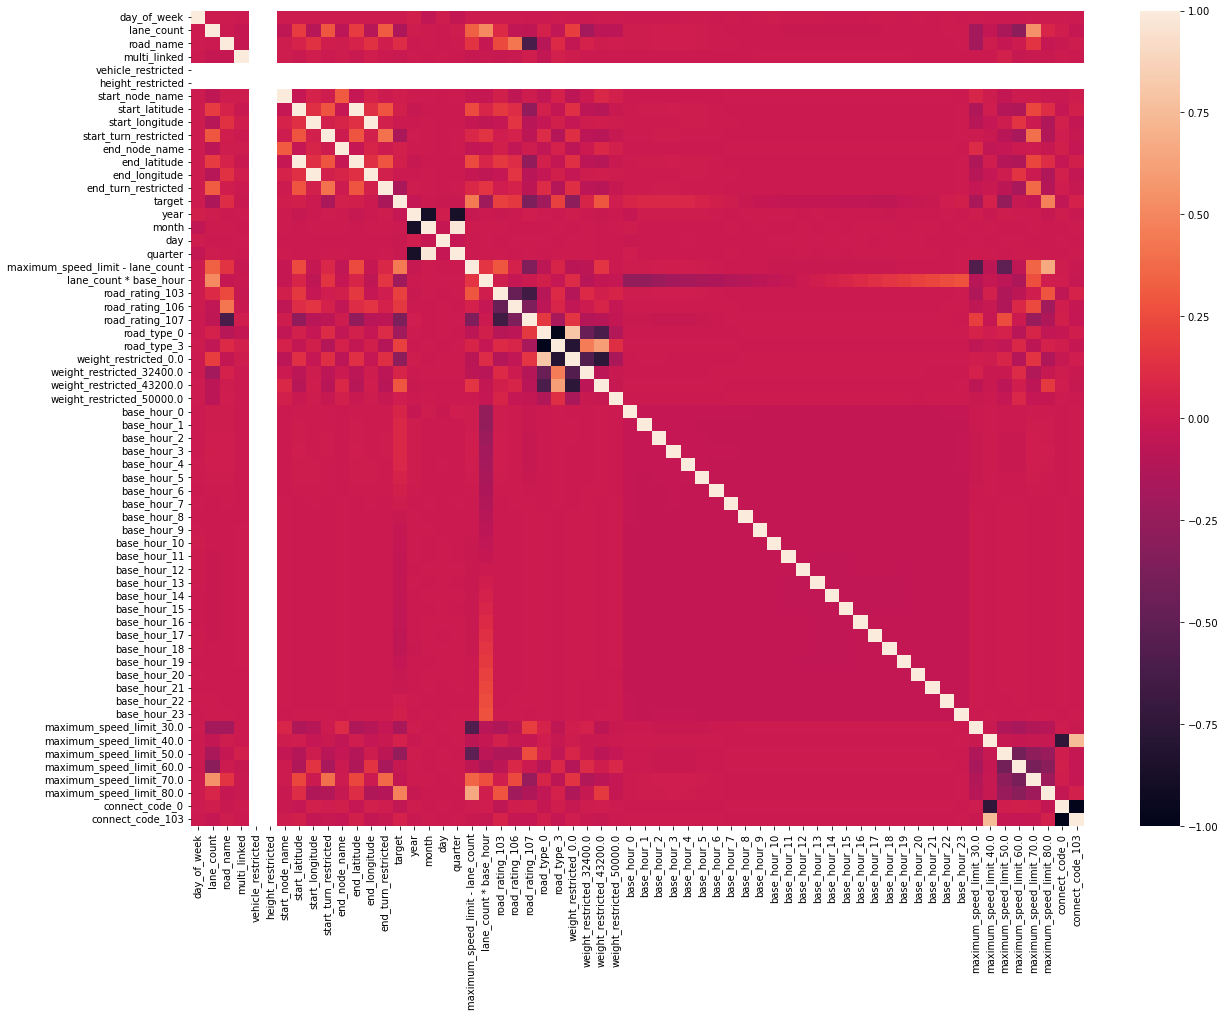

In [12]:
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [13]:
see_data = train_label.copy()
see_test_data = test_label.copy()

In [14]:
see_data

,id,base_date,day_of_week,lane_count,road_name,multi_linked,vehicle_restricted,height_restricted,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,base_hour_0,base_hour_1,base_hour_2,base_hour_3,base_hour_4,base_hour_5,base_hour_6,base_hour_7,base_hour_8,base_hour_9,base_hour_10,base_hour_11,base_hour_12,base_hour_13,base_hour_14,base_hour_15,base_hour_16,base_hour_17,base_hour_18,base_hour_19,base_hour_20,base_hour_21,base_hour_22,base_hour_23,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0,connect_code_0,connect_code_103
0,TRAIN_0000000,2022-06-23,1,1,46,0,0.0,0.0,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,TRAIN_0000001,2022-07-28,1,2,34,0,0.0,0.0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,TRAIN_0000002,2021-10-10,4,2,36,0,0.0,0.0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,TRAIN_0000003,2022-03-11,0,2,57,0,0.0,0.0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,TRAIN_0000004,2021-10-05,6,2,35,0,0.0,0.0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,1,0,0,0.0,0.0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4701213,TRAIN_4701213,2022-03-31,1,2,0,0,0.0,0.0,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4701214,TRAIN_4701214,2022-06-13,3,2,35,0,0.0,0.0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4701215,TRAIN_4701215,2021-10-20,2,2,37,0,0.0,0.0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [16]:
# see_target_lane_count = see_data.groupby(['maximum_speed_limit', 'road_type', 'lane_count', 'base_hour', 'quarter'])['target'].mean().reset_index()
# see_target_lane_count

In [17]:
# f, ax = plt.subplots(figsize = (20, 15))
# sns.lineplot(data = see_target_lane_count, x = 'base_hour', y = 'target', hue = 'quarter')

In [20]:
# def plot_all(df):
#     f, axes = plt.subplots(2, 2, figsize = (20, 15), sharex = True, sharey = True)
#     f.tight_layout()
#     for n, prod in enumerate(df['quarter'].unique()):
#         plot_df = df.loc[df['quarter'] == prod]
#         sns.lineplot(data = plot_df, x = 'base_hour', y = 'target', hue = 'maximum_speed_limit', style = 'connect_code', ax = axes[n // 2, n% 2])
#         axes[n // 2, n % 2].set_title("quarter: "+ str(prod))

In [21]:
# plot_all(see_data)

In [23]:
from xgboost import XGBRegressor
X_train_label = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_label = train_label['target'].copy()
X_train_label

,day_of_week,lane_count,road_name,multi_linked,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,base_hour_0,base_hour_1,base_hour_2,base_hour_3,base_hour_4,base_hour_5,base_hour_6,base_hour_7,base_hour_8,base_hour_9,base_hour_10,base_hour_11,base_hour_12,base_hour_13,base_hour_14,base_hour_15,base_hour_16,base_hour_17,base_hour_18,base_hour_19,base_hour_20,base_hour_21,base_hour_22,base_hour_23,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0,connect_code_0,connect_code_103
0,1,1,46,0,386,33.427747,126.662612,0,386,33.427749,126.662335,0,2022,6,23,2,59.0,17,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,2,34,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,2022,7,28,3,58.0,42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4,2,36,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,2021,10,10,4,78.0,14,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,2,57,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,2022,3,11,1,48.0,26,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6,2,35,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,2021,10,5,4,78.0,16,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,1,0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,2021,11,4,4,49.0,16,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4701213,1,2,0,0,31,33.472505,126.424368,0,31,33.472525,126.424890,0,2022,3,31,1,78.0,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4701214,3,2,35,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,2022,6,13,2,58.0,44,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4701215,2,2,37,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,2021,10,20,4,78.0,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test_xgb = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
X_train_scaler = scaler.fit_transform(X_train_label)
test_xgb = scaler.transform(test_xgb)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaler, y_train_label, test_size=0.2, random_state = 42)

In [26]:
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist', 
                   n_estimators = 5000, early_stopping_rounds = 20, alpha = 0,
                  min_child_weight = 2, subsample = 0.9, colsample_bytree = 0.9,
                  max_depth = 10, eval_metric = 'mae')
    
xgb.fit(X_train, y_train, eval_set = [(X_val, y_val)])

[0]	validation_0-mae:29.62213
[1]	validation_0-mae:20.83004
[2]	validation_0-mae:14.83856
[3]	validation_0-mae:10.83575
[4]	validation_0-mae:8.20590
[5]	validation_0-mae:6.52093
[6]	validation_0-mae:5.46758
[7]	validation_0-mae:4.83072
[8]	validation_0-mae:4.46195
[9]	validation_0-mae:4.22994
[10]	validation_0-mae:4.07398
[11]	validation_0-mae:3.98394
[12]	validation_0-mae:3.92646
[13]	validation_0-mae:3.85408
[14]	validation_0-mae:3.79907
[15]	validation_0-mae:3.75085
[16]	validation_0-mae:3.73578
[17]	validation_0-mae:3.71800
[18]	validation_0-mae:3.70132
[19]	validation_0-mae:3.67910
[20]	validation_0-mae:3.65493
[21]	validation_0-mae:3.63843
[22]	validation_0-mae:3.63228
[23]	validation_0-mae:3.61684
[24]	validation_0-mae:3.60754
[25]	validation_0-mae:3.59428
[26]	validation_0-mae:3.58068
[27]	validation_0-mae:3.55069
[28]	validation_0-mae:3.52231
[29]	validation_0-mae:3.50368
[30]	validation_0-mae:3.49705
[31]	validation_0-mae:3.48736
[32]	validation_0-mae:3.47864
[33]	validation_

[268]	validation_0-mae:3.04869
[269]	validation_0-mae:3.04845
[270]	validation_0-mae:3.04834
[271]	validation_0-mae:3.04784
[272]	validation_0-mae:3.04755
[273]	validation_0-mae:3.04736
[274]	validation_0-mae:3.04698
[275]	validation_0-mae:3.04675
[276]	validation_0-mae:3.04656
[277]	validation_0-mae:3.04645
[278]	validation_0-mae:3.04621
[279]	validation_0-mae:3.04606
[280]	validation_0-mae:3.04582
[281]	validation_0-mae:3.04554
[282]	validation_0-mae:3.04525
[283]	validation_0-mae:3.04526
[284]	validation_0-mae:3.04495
[285]	validation_0-mae:3.04461
[286]	validation_0-mae:3.04423
[287]	validation_0-mae:3.04379
[288]	validation_0-mae:3.04324
[289]	validation_0-mae:3.04294
[290]	validation_0-mae:3.04267
[291]	validation_0-mae:3.04228
[292]	validation_0-mae:3.04176
[293]	validation_0-mae:3.04168
[294]	validation_0-mae:3.04144
[295]	validation_0-mae:3.04134
[296]	validation_0-mae:3.04121
[297]	validation_0-mae:3.04114
[298]	validation_0-mae:3.04077
[299]	validation_0-mae:3.04018
[300]	va

[533]	validation_0-mae:3.00810
[534]	validation_0-mae:3.00796
[535]	validation_0-mae:3.00781
[536]	validation_0-mae:3.00781
[537]	validation_0-mae:3.00780
[538]	validation_0-mae:3.00769
[539]	validation_0-mae:3.00753
[540]	validation_0-mae:3.00738
[541]	validation_0-mae:3.00726
[542]	validation_0-mae:3.00722
[543]	validation_0-mae:3.00712
[544]	validation_0-mae:3.00713
[545]	validation_0-mae:3.00717
[546]	validation_0-mae:3.00701
[547]	validation_0-mae:3.00700
[548]	validation_0-mae:3.00704
[549]	validation_0-mae:3.00710
[550]	validation_0-mae:3.00700
[551]	validation_0-mae:3.00693
[552]	validation_0-mae:3.00688
[553]	validation_0-mae:3.00681
[554]	validation_0-mae:3.00676
[555]	validation_0-mae:3.00683
[556]	validation_0-mae:3.00664
[557]	validation_0-mae:3.00664
[558]	validation_0-mae:3.00640
[559]	validation_0-mae:3.00621
[560]	validation_0-mae:3.00617
[561]	validation_0-mae:3.00603
[562]	validation_0-mae:3.00587
[563]	validation_0-mae:3.00581
[564]	validation_0-mae:3.00582
[565]	va

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=20, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=5000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [27]:
pred_xgb = xgb.predict(test_xgb)

In [28]:
pred_xgb

array([25.501036, 43.351337, 68.34194 , ..., 21.10265 , 26.26028 ,
       48.550667], dtype=float32)

In [29]:
# feature_importance = xgb.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(20, 15))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(test_xgb.columns)[sorted_idx])
# plt.title('Feature Importance')

In [30]:
output = pd.DataFrame({'id' : test.id, 'target':pred_xgb})
output.to_csv('xgb_scaler.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
